In [1]:
#requrements
import sys
import pandas as pd
from datetime import datetime
import sklearn
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, matthews_corrcoef
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

Raw data taken from https://github.com/HUBioDataLab/DrugApp (thanks for data)

In [3]:
import glob
import pandas as pd

# Get a list of all CSV files ending with 'raw_features.csv'
All_drug_files = glob.glob('All_drug_indication_raw_features.csv')

# Check if the file exists and load it into a DataFrame
if All_drug_files:
    all_drugs = pd.read_csv(All_drug_files[0])
    print("Successfully loaded 'All_drug_indication_raw_features.csv' into the 'all_drugs' DataFrame.")
else:
    print("'All_drug_indication_raw_features.csv' not found.")

Successfully loaded 'All_drug_indication_raw_features.csv' into the 'all_drugs' DataFrame.


/tmp/ipython-input-2025475421.py:9: DtypeWarning: Columns (2,4) have mixed types. Specify dtype option on import or set low_memory=False.
  all_drugs = pd.read_csv(All_drug_files[0])


In [4]:
all_drugs['Label'].value_counts() # 1= approved,0 unapproved drug

,count
Label,
1,18427
0,2480


In [5]:
for col in all_drugs.columns:
    print(col)

SMILES
Label
DrugBank ID
Name
Patent_id
Status
NCT_Number
Conditions
Gender
Age_y
Funder_Type
Study Designs
Locations
CPC
Gender_code_0
Gender_code_1
Gender_code_2
Gender_code_3
Age_code_0
Age_code_1
Age_code_2
Age_code_3
Age_code_4
Age_code_5
Allocation_Type_0
Allocation_Type_1
Allocation_Type_2
Allocation_Type_3
Intervention_Model_0
Intervention_Model_1
Intervention_Model_2
Intervention_Model_3
Intervention_Model_4
Intervention_Model_5
Country_0
Country_1
Country_2
Country_3
Country_4
Country_5
Funder_Type_0
Funder_Type_1
Funder_Type_2
Funder_Type_3
Funder_Type_4
Funder_Type_5
claims_#
Duration
Patent_#
PCT_code_0
PCT_code_1
PCT_code_2
CPC_code_0
CPC_code_1
CPC_code_2
CPC_code_3
CPC_code_4
CPC_code_5
logP
MW
PSA
HBA
HBD
Rings
Polarizability
Refractivity
Bond_#
Bioavailability_0
Bioavailability_1
Bioavailability_2
ECFP4.1
ECFP4.2
ECFP4.3
ECFP4.4
ECFP4.5
ECFP4.6
ECFP4.7
ECFP4.8
ECFP4.9
ECFP4.10
ECFP4.11
ECFP4.12
ECFP4.13
ECFP4.14
ECFP4.15
ECFP4.16
ECFP4.17
ECFP4.18
ECFP4.19
ECFP4.20
EC

In [6]:
all_drugs['Conditions'].value_counts() # therapy/indication coverage

,count
Conditions,
HIV INFECTION,107
TYPE 2 DIABETES,98
HYPERTENSION,95
SCHIZOPHRENIA,93
CORONARY ARTERY DISEASE,89
...,...
ST-SEGMENT ELEVATION MYOCARDIAL INFARCTION|NON ST-SEGMENT ELEVATION MYOCARDIAL INFARCTION,1
HEALTHY NON-SMOKERS|CURRENT SMOKERS|COPD PATIENTS,1
UNCOMPLICATED FALCIPARUM MALARIA|ARTEMISININ-RESISTANT,1


In [7]:
all_drugs['Study Designs'].value_counts() # 467 type clinical trial study design coverage

,count
Study Designs,
Allocation: Randomized|Intervention Model: Parallel Assignment|Masking: None (Open Label)|Primary Purpose: Treatment,3520
Allocation: N/A|Intervention Model: Single Group Assignment|Masking: None (Open Label)|Primary Purpose: Treatment,2126
"Allocation: Randomized|Intervention Model: Parallel Assignment|Masking: Quadruple (Participant, Care Provider, Investigator, Outcomes Assessor)|Primary Purpose: Treatment",1859
"Allocation: Randomized|Intervention Model: Parallel Assignment|Masking: Double (Participant, Investigator)|Primary Purpose: Treatment",1003
"Allocation: Randomized|Intervention Model: Parallel Assignment|Masking: Triple (Participant, Care Provider, Investigator)|Primary Purpose: Treatment",645
...,...
Observational Model: Other|Time Perspective: Prospective,1
"Allocation: Randomized|Intervention Model: Single Group Assignment|Masking: Quadruple (Participant, Care Provider, Investigator, Outcomes Assessor)|Primary Purpose: Basic Science",1
Allocation: Randomized|Intervention Model: Crossover Assignment|Masking: Single (Participant)|Primary Purpose: Health Services Research,1


Deletion on all patents related features columns becouse patent does not play any significance role in Drug discovery or approval

In [9]:
#Droping patents related columns like from combined_df create final_df
drop_cols = ['Study Designs','Age_y','Patent_id','DrugBank ID','claims_#','Duration','Patent_#','PCT_code_0','PCT_code_1','PCT_code_2','CPC_code_0','CPC_code_1','CPC_code_2','CPC_code_3','CPC_code_4','CPC_code_5']
final_df=all_drugs.drop(drop_cols, axis=1)

In [10]:
drop_cal2=['Name', 'Status','NCT_Number','Funder_Type','Locations','CPC']
final_df=final_df.drop(drop_cal2, axis=1)

In [11]:
drop_cal3=['Gender','SMILES','Conditions']
final_df=final_df.drop(drop_cal3, axis=1)

In [12]:
final_df.shape

(20907, 173)

** Automatic Hyperparamer tuning Framework**

In [13]:
!pip install optuna
import optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 6.6 MB/s eta 0:00:00


In [14]:
x=final_df.drop('Label', axis=1)
y=final_df['Label']

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [16]:
from ast import mod
from math import log
def objective(trial):
  #tuning hyperparameter
  max_depth=trial.suggest_int('max_depth', 1, 30, log=True)
  n_estimators=trial.suggest_int('n_estimators', 1, 200, log=True)
  min_samples_split=trial.suggest_int('min_samples_split', 2, 100, log=True)
  min__sample_leaf=trial.suggest_int('min_samples_leaf', 1, 100, log=True)
  criterion=trial.suggest_categorical('criterion', ['gini', 'entropy','log_loss'])
  #create the model on above parameters
  model=RandomForestClassifier(max_depth=max_depth, n_estimators=n_estimators, min_samples_split=min_samples_split, min_samples_leaf=min__sample_leaf, criterion=criterion)
  model.fit(x_train, y_train)
  #make prediction and evaluation of model
  y_pred=model.predict(x_test)
  accuracy=accuracy_score(y_test, y_pred)
  return accuracy

In [17]:
study=optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2025-09-13 07:20:37,138] A new study created in memory with name: no-name-1b71c930-4495-45f3-afb3-5b2599a11966
[I 2025-09-13 07:20:37,376] Trial 0 finished with value: 0.940883872202028 and parameters: {'max_depth': 13, 'n_estimators': 7, 'min_samples_split': 5, 'min_samples_leaf': 1, 'criterion': 'entropy'}. Best is trial 0 with value: 0.940883872202028.
[I 2025-09-13 07:20:38,610] Trial 1 finished with value: 0.8909508322173331 and parameters: {'max_depth': 6, 'n_estimators': 66, 'min_samples_split': 6, 'min_samples_leaf': 26, 'criterion': 'entropy'}. Best is trial 0 with value: 0.940883872202028.
[I 2025-09-13 07:20:39,746] Trial 2 finished with value: 0.8907595178878898 and parameters: {'max_depth': 9, 'n_estimators': 43, 'min_samples_split': 12, 'min_samples_leaf': 66, 'criterion': 'entropy'}. Best is trial 0 with value: 0.940883872202028.
[I 2025-09-13 07:20:40,028] Trial 3 finished with value: 0.8850200880045915 and parameters: {'max_depth': 1, 'n_estimators': 40, 'min_sample

# Best Parameter

In [18]:
study.best_params

{'max_depth': 26,
 'n_estimators': 20,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'criterion': 'log_loss'}

**Best values (accuracy)**

In [19]:
study.best_value

0.9594413621580257

In [ ]:
optuna.visualization.plot_param_importances(study)

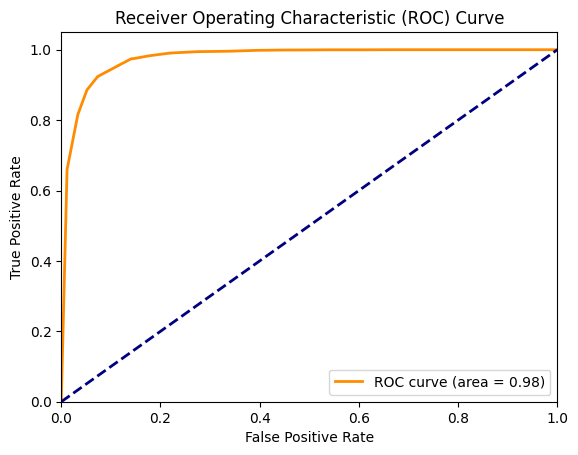

In [20]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Train a RandomForestClassifier with the best parameters
best_params = study.best_params
best_model = RandomForestClassifier(**best_params)
best_model.fit(x_train, y_train)

# Predict probabilities on the test set
y_pred_proba = best_model.predict_proba(x_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

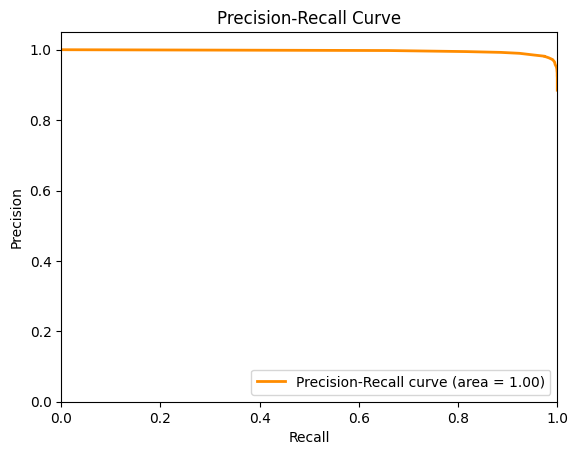

In [21]:
from sklearn.metrics import precision_recall_curve, auc

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

# Calculate the area under the precision-recall curve
pr_auc = auc(recall, precision)

# Plot the Precision-Recall curve
plt.figure()
plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

**Trying with model XGBoost**

In [25]:
!pip install xgboost

In [26]:
from xgboost import XGBClassifier

In [29]:
def objective_xgb(trial):
  n_estimators=trial.suggest_int('n_estimators', 1, 200, log=True)
  max_depth=trial.suggest_int('max_depth', 1, 30, log=True)
  learning_rate=trial.suggest_float('learning_rate', 0.001, 1.0, log=True)
  subsample=trial.suggest_float('subsample', 0.1, 1.0, log=True)
  colsample_bytree=trial.suggest_float('colsample_bytree', 0.1, 1.0, log=True)
  min_child_weight=trial.suggest_int('min_child_weight', 1, 100, log=True)
  reg_alpha=trial.suggest_float('reg_alpha', 0.0, 1.0)
  reg_lambda=trial.suggest_float('reg_lambda', 0.0, 1.0)
  model=XGBClassifier(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, subsample=subsample, colsample_bytree=colsample_bytree, min_child_weight=min_child_weight, reg_alpha=reg_alpha, reg_lambda=reg_lambda)
  model.fit(x_train, y_train)
  y_pred=model.predict(x_test)
  accuracy=accuracy_score(y_test, y_pred)
  return accuracy

In [30]:
study=optuna.create_study(direction='maximize')
study.optimize(objective_xgb, n_trials=100)

[I 2025-09-13 07:40:28,493] A new study created in memory with name: no-name-9e7cd5fc-7f7f-44de-9253-8b7abb6d9bc0
[I 2025-09-13 07:40:28,858] Trial 0 finished with value: 0.8850200880045915 and parameters: {'n_estimators': 1, 'max_depth': 18, 'learning_rate': 0.004340745635682059, 'subsample': 0.5399928510921593, 'colsample_bytree': 0.7266327987893321, 'min_child_weight': 1, 'reg_alpha': 0.4693583210508723, 'reg_lambda': 0.8350905437704298}. Best is trial 0 with value: 0.8850200880045915.
[I 2025-09-13 07:40:29,136] Trial 1 finished with value: 0.8850200880045915 and parameters: {'n_estimators': 3, 'max_depth': 16, 'learning_rate': 0.014471323526991726, 'subsample': 0.7501224578229041, 'colsample_bytree': 0.3124250850754821, 'min_child_weight': 6, 'reg_alpha': 0.7514174587743627, 'reg_lambda': 0.7598204984041528}. Best is trial 0 with value: 0.8850200880045915.
[I 2025-09-13 07:40:29,405] Trial 2 finished with value: 0.8850200880045915 and parameters: {'n_estimators': 6, 'max_depth': 1

**Best Parameters**

In [32]:
study.best_params

{'n_estimators': 122,
 'max_depth': 26,
 'learning_rate': 0.2109273908851353,
 'subsample': 0.6853548415429973,
 'colsample_bytree': 0.151535283857884,
 'min_child_weight': 2,
 'reg_alpha': 0.4100621538162067,
 'reg_lambda': 0.07402584158642962}

**Best values (accuracy)**

In [33]:
study.best_value

0.9713028505835087

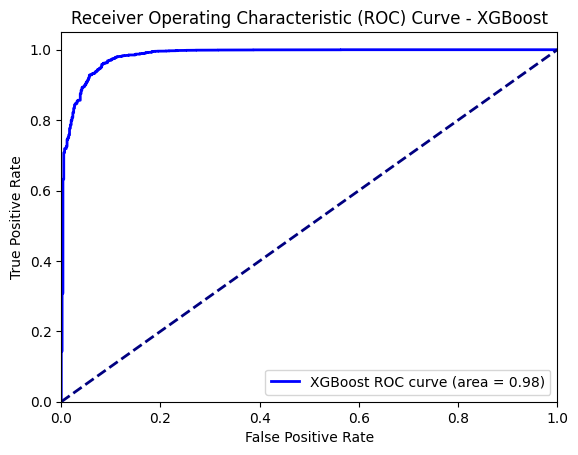

In [37]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

# Train XGBoostClassifier with best parameters
best_xgb_params = study.best_params
best_xgb_model = XGBClassifier(**best_xgb_params)
best_xgb_model.fit(x_train, y_train)

# Predict probabilities on the test set
y_pred_proba_xgb = best_xgb_model.predict_proba(x_test)[:, 1]

# Calculate ROC curve and AUC
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot the ROC curve
plt.figure()
plt.plot(fpr_xgb, tpr_xgb, color='blue', lw=2, label='XGBoost ROC curve (area = %0.2f)' % roc_auc_xgb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - XGBoost')
plt.legend(loc="lower right")
plt.show()

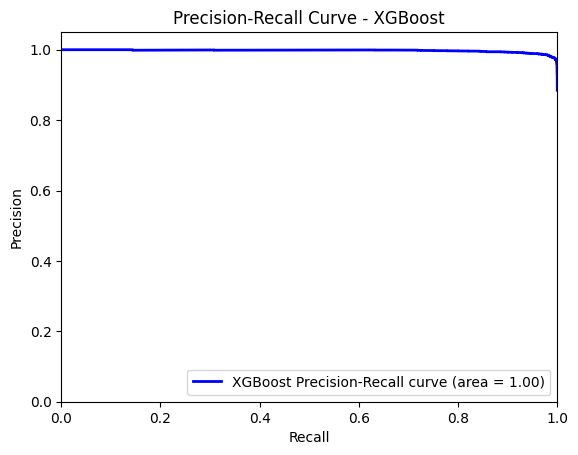

In [38]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

# Train XGBoostClassifier with best parameters (assuming study object is available from previous steps)
best_xgb_params = study.best_params
best_xgb_model = XGBClassifier(**best_xgb_params)
best_xgb_model.fit(x_train, y_train)

# Predict probabilities on the test set
y_pred_proba_xgb = best_xgb_model.predict_proba(x_test)[:, 1]

# Calculate precision and recall
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_pred_proba_xgb)

# Calculate the area under the precision-recall curve
pr_auc_xgb = auc(recall_xgb, precision_xgb)

# Plot the Precision-Recall curve
plt.figure()
plt.plot(recall_xgb, precision_xgb, color='blue', lw=2, label='XGBoost Precision-Recall curve (area = %0.2f)' % pr_auc_xgb)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - XGBoost')
plt.legend(loc="lower right")
plt.show()